# **1. Mount Google Drive** (Not applicable in VS Code)

In [1]:
# Mount google drive
#from google.colab import drive
#drive.mount('/content/drive')

---
# **2. Import Libraries**

In [2]:
# Import pandas, numpy and seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sqlite3
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns',None)
%matplotlib inline

C:\Users\rober\AppData\Local\Temp\ipykernel_29560\4237345737.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---

# **3. Import Files and data manipulation**


### Importing Data from Text Files as CSV into SQLite Database

This code snippet demonstrates how to connect to an SQLite database and import data from two text files, assuming they are already formatted as CSV (Comma-Separated Values). However, it appears there might be a slight misunderstanding in the prompt, as the code provided does not explicitly show the importation of text files into the database. Instead, it outlines the process of connecting to an existing SQLite database, querying data from a table, and loading this data into a pandas DataFrame for further analysis or manipulation.

### Here's a breakdown of the key operations performed in the code:

1. **Database Connection Establishment:**
   - The `sqlite3.connect(db_path)` function is used to establish a connection to an SQLite database located at the specified path (`'C:/Users/rober/SQLite/CyberSentryDB.db'`). This connection is stored in the variable `conn`.

2. **Cursor Creation:**
   - A cursor object, which allows for SQL commands to be executed in a database session, is created by calling `conn.cursor()`.

3. **Data Querying:**
   - The `pd.read_sql_query("SELECT * FROM network_activity", conn)` function is utilized to perform a SQL query on the connected database. This query selects all records from the `network_activity` table. The result of this query is loaded into a pandas DataFrame (`df`), providing a powerful data structure for data analysis tasks.

4. **Closing the Connection:**
   - It's important to close the cursor and the connection to the database once the necessary operations are completed to free up database resources. This is done using `cursor.close()` and `conn.close()`.

In [3]:
# Define the path to the SQLite database file
db_path = 'C:/Users/rober/SQLite/CyberSentryDB.db'

# Establish a connection to the database specified by db_path
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SQL query to select all records from the 'network_activity' table
# and store the result in a pandas DataFrame 'df' for further analysis
df = pd.read_sql_query("SELECT * FROM network_activity", conn)

# Close the cursor to release database resources
cursor.close()

# Close the connection to the database to ensure data integrity and release resources
conn.close()

## 3.1. **Visualize imported files**


*   Using `df.head()` method from the Pandas library to observe what the imported files first 5 rows look like.
*   Using `df.info()` method we can see the datafram and check if there are null values or missing data, that we later would have to correct and clean.



In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.0,0.0,0.0,30,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.0,0.0,0.09,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     148517 non-null  object
 1   protocol_type                148517 non-null  object
 2   service                      148517 non-null  object
 3   flag                         148517 non-null  object
 4   src_bytes                    148517 non-null  object
 5   dst_bytes                    148517 non-null  object
 6   land                         148517 non-null  object
 7   wrong_fragment               148517 non-null  object
 8   urgent                       148517 non-null  object
 9   hot                          148517 non-null  object
 10  num_failed_logins            148517 non-null  object
 11  logged_in                    148517 non-null  object
 12  num_compromised              148517 non-null  object
 13  root_shell    

## **3.2 Concatenate the two dataframes**

  - We used the `pd.concat([df1,df2], ignore_index=True)` to place all dataframes under the same dataframe

In [6]:
# This line updates the 'outcome' column in the df_train DataFrame again.
# For all rows where the 'outcome' is not 'normal', it sets the 'outcome' value to 'attack'.
# This is a way to categorize all outcomes into two groups: 'normal' and 'attack',
# effectively binarizing the 'outcome' column into these two categories.
df.loc[df['outcome'] == "normal", "outcome"] = 'normal'

df.loc[df['outcome'] != 'normal', "outcome"] = 'attack'

In [7]:
def bar_plot(df, cols_list, rows, cols):
    # Create a grid of subplots with the specified number of rows and columns.
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    fig.tight_layout(pad=1.0)  # Add spacing between plots for clarity

    # Flatten the axes array and iterate over it along with the column names in cols_list.
    for ax, col in zip(axes.ravel(), cols_list):
        # Use Seaborn's countplot to create a bar chart.
        sns.countplot(x=col, data=df, ax=ax)

        # Calculate the total number of data points for the percentage calculation.
        total = len(df[col])

        # Iterate through the patches (bars) in the barplot to get their properties.
        for p in ax.patches:
            # Calculate the percentage and format it.
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            # Get the x and y coordinates to place the text.
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            # Place the text on the bar.
            ax.text(x, y, percentage, ha='center', va='bottom')

        # Set the title of the current subplot to the name of the column.
        ax.set_title(str(col), fontsize=12)

        # Rotate the x-axis labels for better readability.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Adjust the layout and display the figure with all the bar charts.
    plt.tight_layout()
    plt.show()


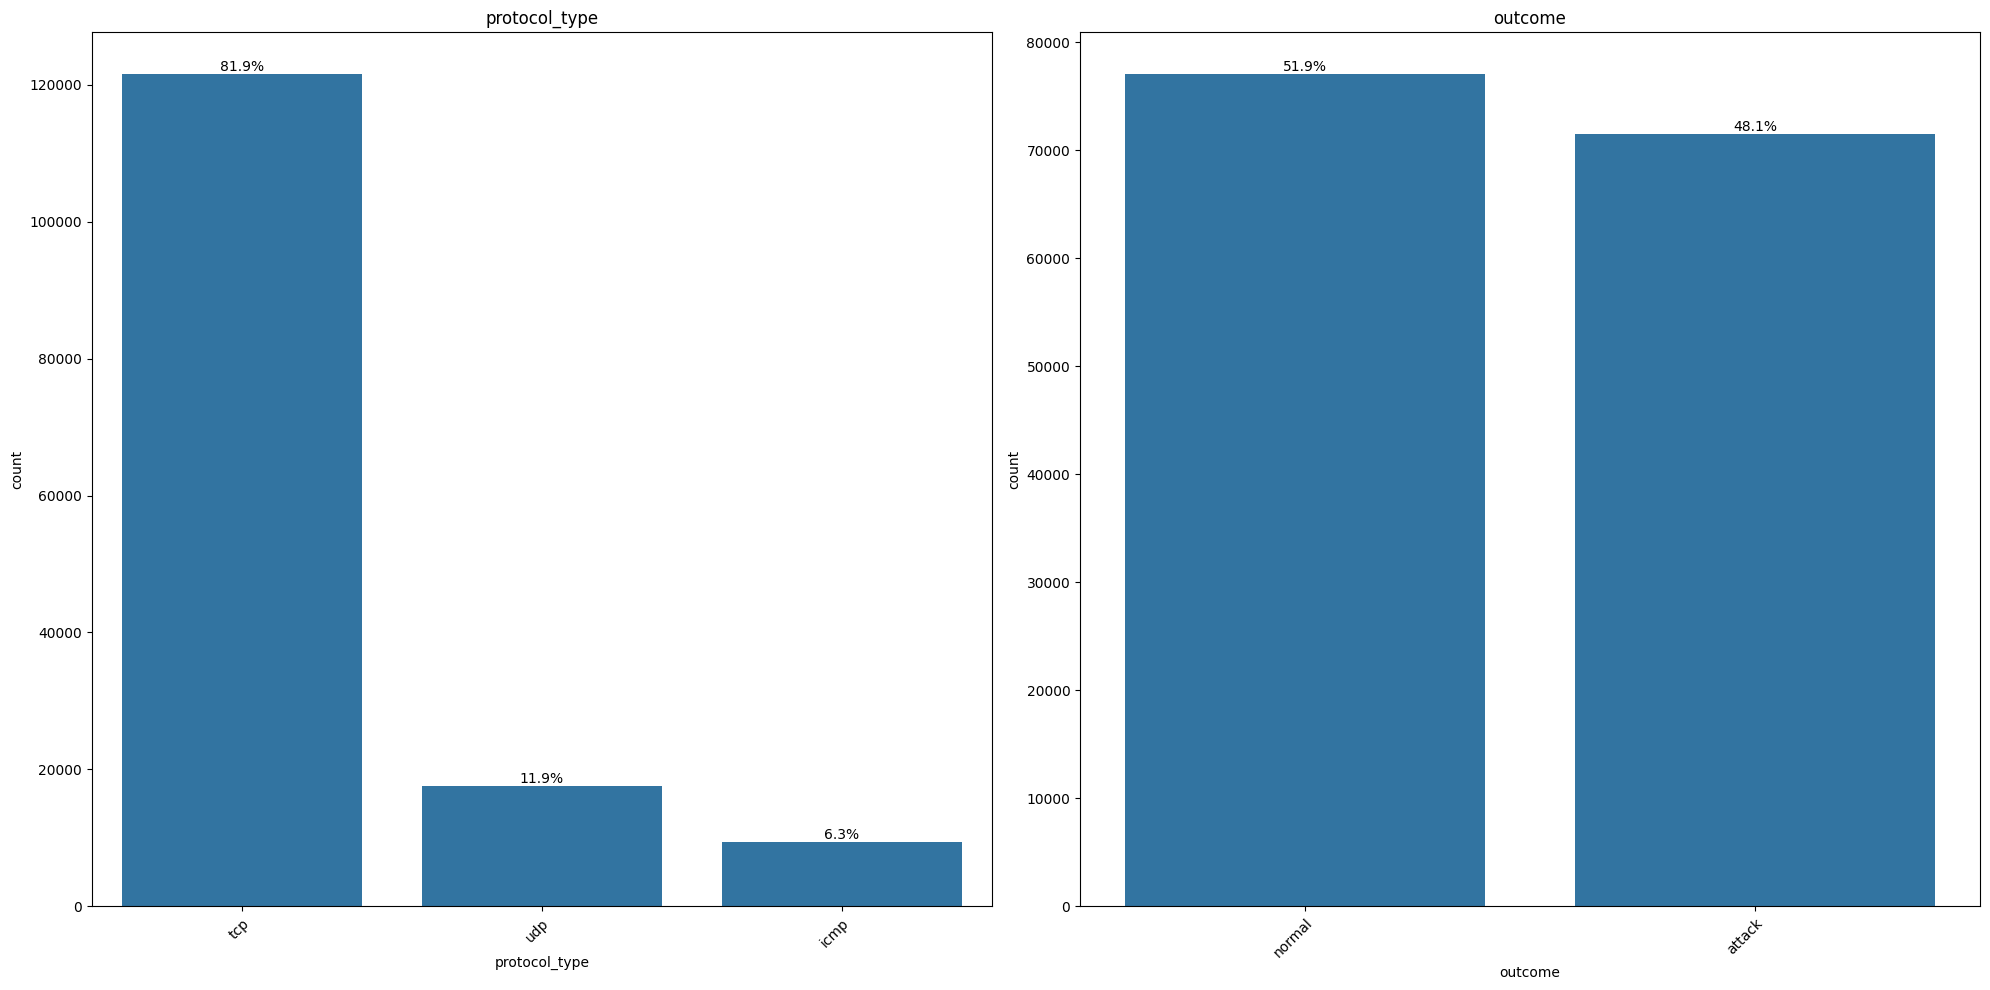

In [8]:
bar_plot(df, ['protocol_type', 'outcome'],1,2)

In [9]:
def pie_plot(df, cols_list, rows, cols):
    # Create a grid of subplots with the specified number of rows and columns.
    fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
    fig.tight_layout(pad=1.0)  # Add spacing between plots for clarity

    # If there is only one row or one column, axes is a 1D numpy array.
    if rows == 1 or cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.ravel()  # Flatten the axes array for iteration

    # Iterate over the axes array and the column names in cols_list.
    for ax, col in zip(axes, cols_list):
        # Calculate the value counts for the current column.
        counts = df[col].value_counts()

        # Create a pie chart in each subplot.
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

        # Set the title of the current subplot to the name of the column.
        ax.set_title(str(col), fontsize=12)

    # Adjust the layout and display the figure with all the pie charts.
    plt.tight_layout()
    plt.show()

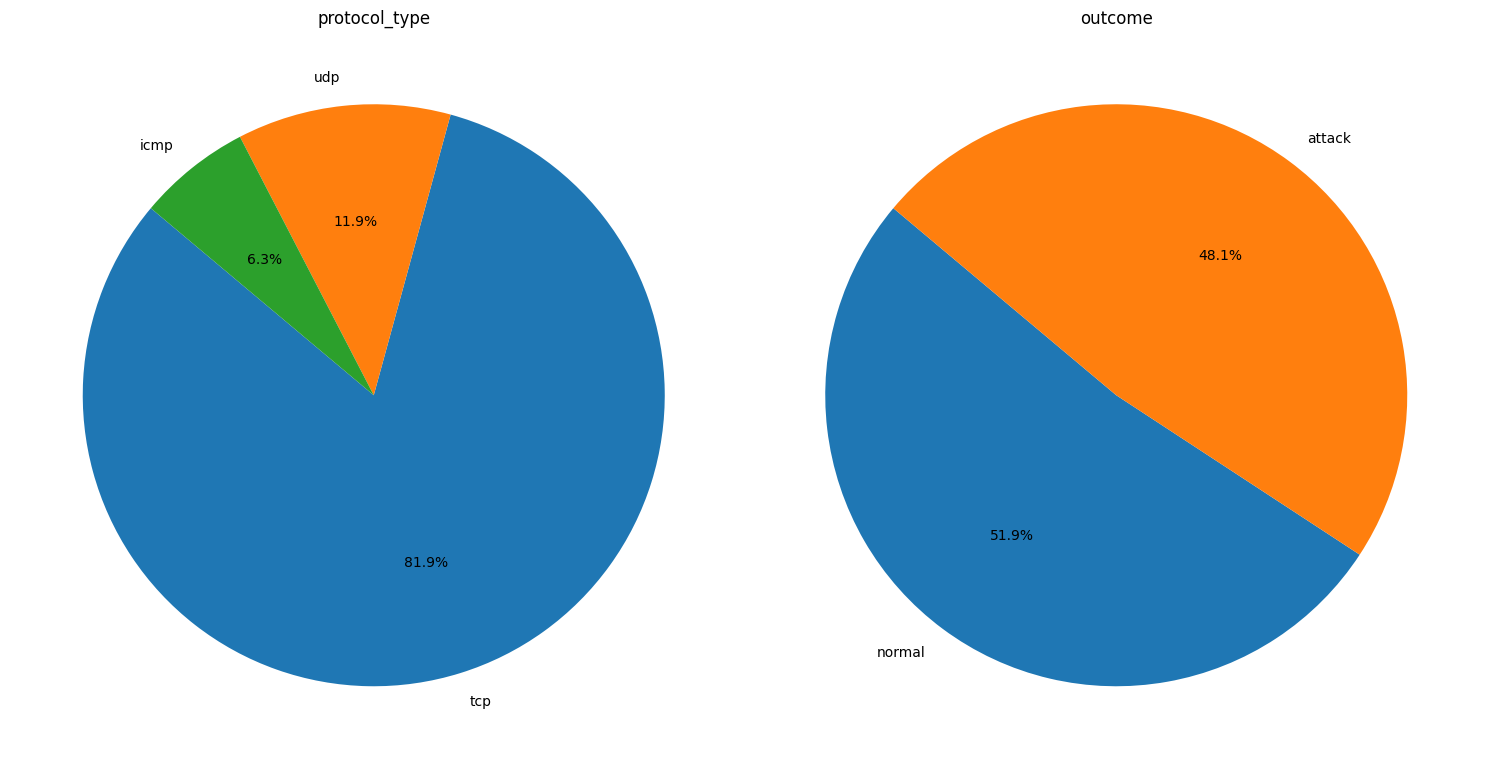

In [10]:
pie_plot(df, ['protocol_type','outcome'], 1, 2)

------------------------------

# **4. Preprocessing the Data**

## 4.1. Scaling the Data

Preprocesses the dataframe by scaling numerical features and encoding categorical ones.

    Parameters:
    - dataframe: DataFrame to preprocess.
    - scaler: Fitted StandardScaler instance. If None, a new scaler will be fitted.

    Returns:
    - DataFrame after preprocessing.

In [11]:
def preprocess(dataframe, scaler=None):
    """
    Preprocesses the dataframe by scaling numerical features and encoding categorical ones.

    Parameters:
    - dataframe: DataFrame to preprocess.
    - scaler: Fitted StandardScaler instance. If None, a new scaler will be fitted.

    Returns:
    - DataFrame after preprocessing.
    """

    # Separate categorical and numerical columns
    cat_cols = ['is_host_login', 'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_guest_login', 'level', 'outcome']
    num_cols = dataframe.drop(columns=cat_cols).columns

    # Scale numerical columns
    if not scaler:
        scaler = StandardScaler()
    dataframe[num_cols] = scaler.fit_transform(dataframe[num_cols])

    # Encode 'outcome' as binary
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    # Encode categorical columns as dummies
    dataframe = pd.get_dummies(dataframe, columns=['protocol_type', 'service', 'flag'])

    return dataframe, scaler

In [12]:
# Fit and transform the training data
df_scaled, scaler = preprocess(df)

In [13]:
df_scaled.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.112481,-0.007346,-0.004614,0,-0.085488,-0.010403,-0.094071,-0.059832,0,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,0.0,0,0,-0.696611,-0.348310,-0.594848,-0.590270,-0.40646,-0.405192,0.749108,-0.348092,-0.376389,-0.344349,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,0,20,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,-0.112481,-0.007409,-0.004614,0,-0.085488,-0.010403,-0.094071,-0.059832,0,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,0.0,0,0,-0.602401,-0.361578,-0.594848,-0.590270,-0.40646,-0.405192,-1.358363,0.422462,-0.376389,0.721338,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,0,15,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,-0.112481,-0.007436,-0.004614,0,-0.085488,-0.010403,-0.094071,-0.059832,0,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,0.0,0,0,0.339700,-0.295238,1.720415,1.721459,-0.40646,-0.405192,-1.427085,0.011499,-0.376389,0.721338,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,1,19,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

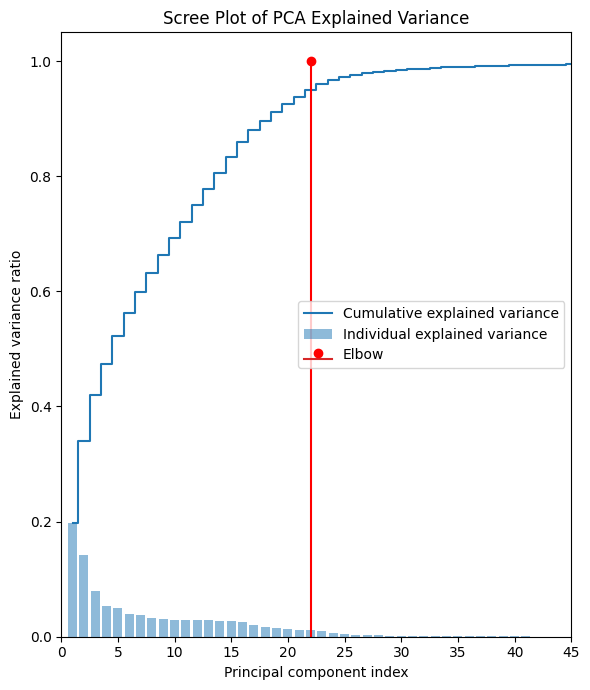

In [14]:
# Prepare feature and target variables
X = df_scaled.drop(['outcome', 'level'], axis=1)
y_classification = df_scaled['outcome'].astype(int)  # Direct conversion to int for classification
y_regression = df_scaled['level']  # For regression

# Apply PCA to assess dimensionality reduction (without initially specifying n_components)
pca = PCA()
pca.fit(X)

# Generate a scree plot to visualize explained variance ratio by each component
plt.figure(figsize=(6, 7))
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks(range(0, len(explained_variance_ratio) + 1, 5))  # Set x-axis ticks to show every 10th label
plt.xlim(0,45)
plt.stem(22, 1, linefmt = 'red', label= 'Elbow')
plt.legend(loc='best')
plt.title('Scree Plot of PCA Explained Variance')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

## 4.2. PCA - Principal Component Analysis

Principal Component Analysis (PCA) is a statistical method used to simplify data with many dimensions (features) into fewer dimensions, while retaining the essence of the original data. This is achieved by identifying and selecting the most significant features that encapsulate the bulk of the dataset's information. These features are chosen based on the amount of variance they contribute to the dataset. The feature contributing the most variance becomes the first principal component, with subsequent principal components being those that account for the next highest variances, in descending order. A key aspect of PCA is that these principal components are mutually uncorrelated.

The advantages of using PCA for dimensionality reduction are notable, particularly in two key areas:

1. **Reduced Training Time for Algorithms**: By decreasing the number of features in a dataset, PCA significantly lowers the computational burden. This reduction leads to a faster training process for machine learning algorithms, as they have fewer dimensions to process and analyze.

2. **Simplified Data Visualization and Analysis**: High-dimensional data can be challenging to visualize and understand. For example, with a dataset containing 100 features, the total number of possible scatter plots for pairwise feature comparison would be [100 x (100 - 1)] / 2 = 4950. Such a high number of plots makes practical analysis and visualization impractical, if not impossible. PCA helps in this context by reducing the number of dimensions, making the data more manageable and easier to interpret visually.

In [15]:
# Prepare feature and target variables
x = df_scaled.drop(['outcome', 'level'], axis=1).values
y = df_scaled['outcome'].values.astype(int)  # Direct conversion to int
y_reg = df_scaled['level'].values

# Apply PCA to reduce dimensionality for the classification task
pca = PCA(n_components=23).fit(x)  # Fit and instantiate PCA in one step
x_reduced = pca.transform(x)
print(f"Number of original features is {x.shape[1]} and of reduced features is {x_reduced.shape[1]}")

# Splitting the dataset into training and testing sets for both original and reduced feature sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

# Initialize a dictionary to store evaluation metrics
model_evals = dict()

Number of original features is 122 and of reduced features is 23


In [16]:
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):

    # Fit the model using the training data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train, average='macro')
    test_precision = precision_score(y_test, y_pred_test, average='macro')
    train_recall = recall_score(y_train, y_pred_train, average='macro')
    test_recall = recall_score(y_test, y_pred_test, average='macro')

    # Output metrics
    print(f"Training Accuracy {name}: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy {name}: {test_accuracy*100:.2f}%")
    print(f"Training Precision {name}: {train_precision*100:.2f}%")
    print(f"Test Precision {name}: {test_precision*100:.2f}%")
    print(f"Training Recall {name}: {train_recall*100:.2f}%")
    print(f"Test Recall {name}: {test_recall*100:.2f}%")

    # Display confusion matrix
    confusion_mtx = confusion_matrix(y_test, y_pred_test)
    display_labels = ['Normal', 'Attack']
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=display_labels)
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.grid(False)
    plt.show()

# You will call the evaluate_classification function like this, for example:
# evaluate_classification(your_model, 'Your Model Name', X_train, X_test, y_train_class, y_test_class)


----------

# **5. Modeling**

Modeling in machine learning involves training an algorithm to predict outcomes based on input features. This process includes adjusting the model to suit specific business requirements and validating its performance using unseen data. The end result of this process is a trained model, ready to make predictions on new data.

A machine learning model is essentially a file that's been educated to identify specific patterns. You train this model using a dataset and an algorithm, which enables the model to learn and interpret the data. After the training phase, the model can apply its learned patterns to new, unseen data to make predictions. For instance, consider you're developing a software to identify a person's emotions through their facial expressions. To do this, you'd train your model with a collection of facial images, each labeled with a corresponding emotion. Once trained, this model can then be integrated into an application to recognize emotions in different individuals.

## 5.1. Logistic Regression


Logistic regression, also known as a logit model, is a statistical method predominantly used in classification and predictive analytics. This model estimates the likelihood of a binary outcome (such as "voted" vs. "didn’t vote") based on independent variables in the dataset. The predicted outcome is a probability value, which is confined between 0 and 1.

In logistic regression, the logit transformation is applied. This transformation calculates the log odds, or the natural logarithm of the ratio of the probability of success (an event occurring) to the probability of failure (the event not occurring).

In [17]:
# Initialize Logistic Regression model with various parameters
lr = LogisticRegression(
    penalty='l2',                # Specifies the norm used in the penalization (regularization). 'l2' is the standard L2 regularization.
    tol=1e-4,                    # Tolerance for stopping criteria. This tells the model when to stop searching for a minimum (convergence).
    C=0.1,                       # Inverse regularization strength. Smaller values specify stronger regularization.
    fit_intercept=True,          # Specifies if a constant (bias or intercept) should be added to the decision function.
    class_weight=None,           # Weights associated with classes. If None, all classes are supposed to have weight one.
    random_state=None,           # The seed used by the random number generator (for shuffling the data).
    solver='newton-cg',                # Algorithm to use in the optimization problem. For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
    max_iter=10000,              # Maximum number of iterations for the solvers to converge.
    n_jobs=8,                 # Number of CPU cores used when parallelizing. None means 1 unless in a joblib.parallel_backend context.
    l1_ratio=None                # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.
)

# Fit the Logistic Regression model on the training dataset
# This step involves training the model using the training data
lr.fit(X_train, y_train_class)

LogisticRegression(max_iter=10000, solver='newton-cg')

Training Accuracy Logistic Regression: 95.76%  Test Accuracy Logistic Regression: 95.67%
Training Precision Logistic Regression: 96.65%  Test Precision Logistic Regression: 96.65%
Training Recall Logistic Regression: 94.48%  Test Recall Logistic Regression: 94.25%


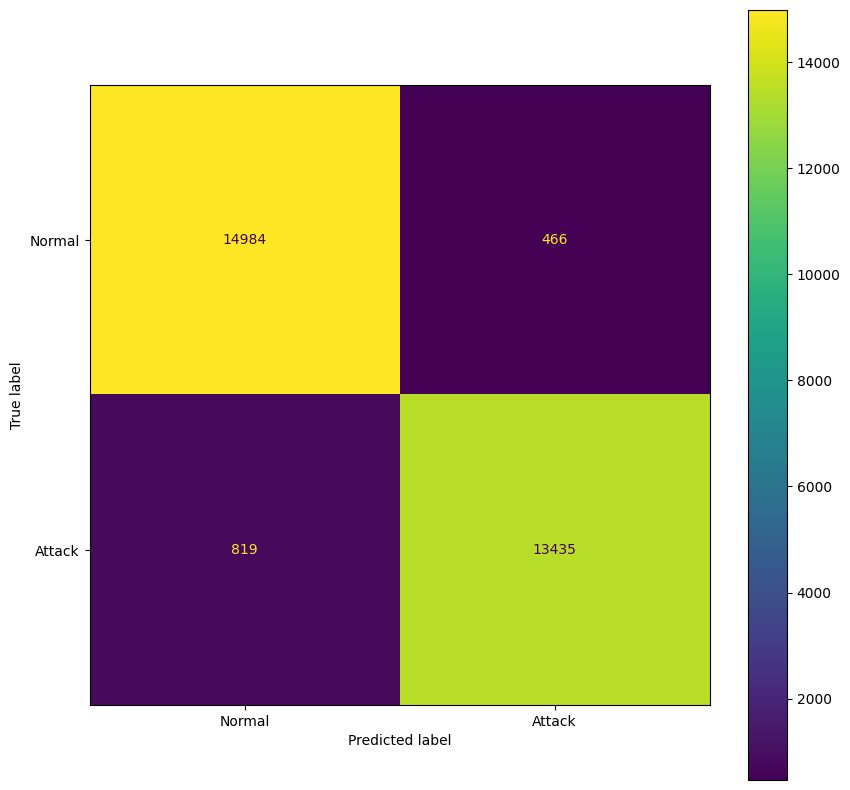

Cross-Validation Accuracy Scores: [0.95631865 0.95745487 0.95859109 0.9576635  0.95770558]
Mean CV Accuracy: 0.96, Standard Deviation in CV Accuracy: 0.00


In [18]:
# Evaluate the fitted model's performance on both the training and testing datasets
# The 'evaluate_classification' function prints out several metrics and displays a confusion matrix
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
cv_scores = cross_val_score(lr, x_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()
print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")


------------
# **6. Random Forest**

Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems. and It also resists overfitting found in decision trees.

In [21]:
# Initialize the RandomForestClassifier with various parameters
rf = RandomForestClassifier(
    n_estimators=150,        # Number of trees in the forest.
    criterion='gini',        # The function to measure the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain.
    max_depth=None,          # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2,     # The minimum number of samples required to split an internal node.
    min_samples_leaf=1,      # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_leaf_nodes=None,     # Grow trees with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity.
    min_impurity_decrease=0.0, # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    bootstrap=True,          # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    oob_score=False,         # Whether to use out-of-bag samples to estimate the generalization accuracy.
    n_jobs=-1,             # The number of jobs to run in parallel. None means 1. -1 means using all processors.
    random_state=None,       # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node.
    verbose=0,               # Controls the verbosity when fitting and predicting.
    warm_start=False,        # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    class_weight=None,       # Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.
    ccp_alpha=0.0,           # Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than `ccp_alpha` will be chosen.
    max_samples=None         # If bootstrap is True, the number of samples to draw from X to train each base estimator.
)

# Fit the Random Forest classifier to the training data
rf.fit(x_train, y_train_class)

NameError: name 'y_train_class' is not defined

In [ ]:
# Evaluate the model's performance on both the training and test sets
evaluate_classification(rf, "RandomForestClassifier", X_train, X_test, y_train_class, y_test_class)

# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
cv_scores = cross_val_score(rf, X_train, y_train_class, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()
print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")